In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r"C:\Users\ASUS\Downloads\valid_fake\fake\valid_fake_0234741.png", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,100,200)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Extract Edges for All Folders

In [7]:
import cv2
import os

def apply_laplacian(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for img_file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
            lap = cv2.convertScaleAbs(lap)  # Convert back to uint8
            cv2.imwrite(os.path.join(output_dir, img_file), lap)

# Process all dataset folders
folders = {
    r"C:\Users\ASUS\Downloads\Test\train Real": "./edges/train/real",
    r"C:\Users\ASUS\Downloads\Test\train fake": "./edges/train/fake",
    r"C:\Users\ASUS\Downloads\Test\valid real": "./edges/valid/real",
   r"C:\Users\ASUS\Downloads\Test\valid fake": "./edges/valid/fake"
}

for input_dir, output_dir in folders.items():
    apply_laplacian(input_dir, output_dir)


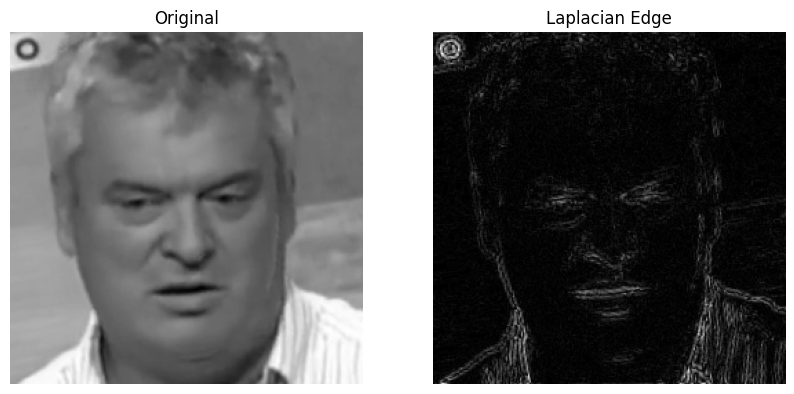

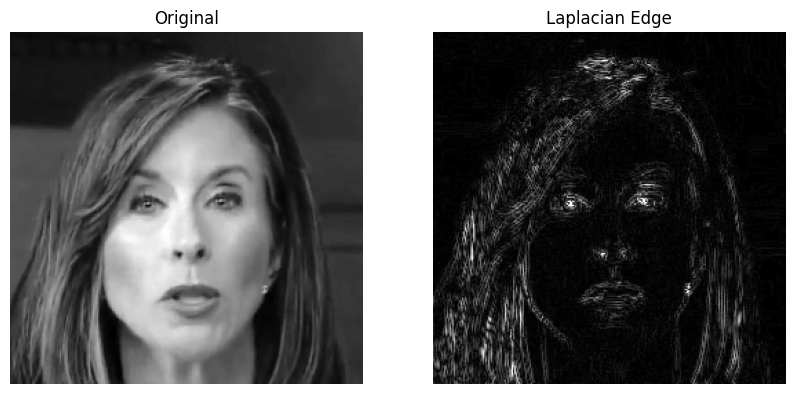

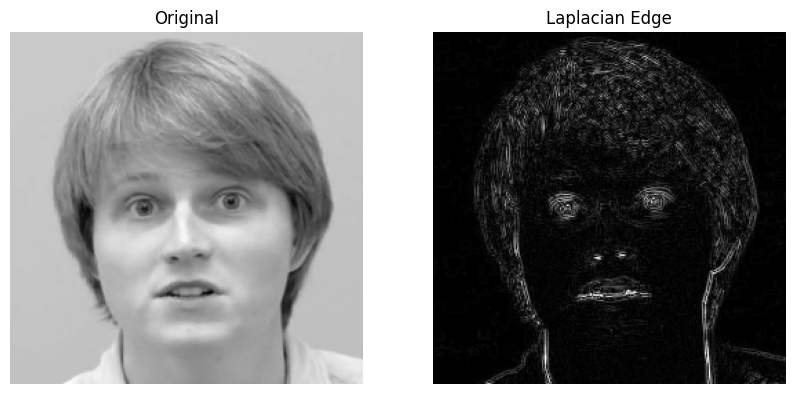

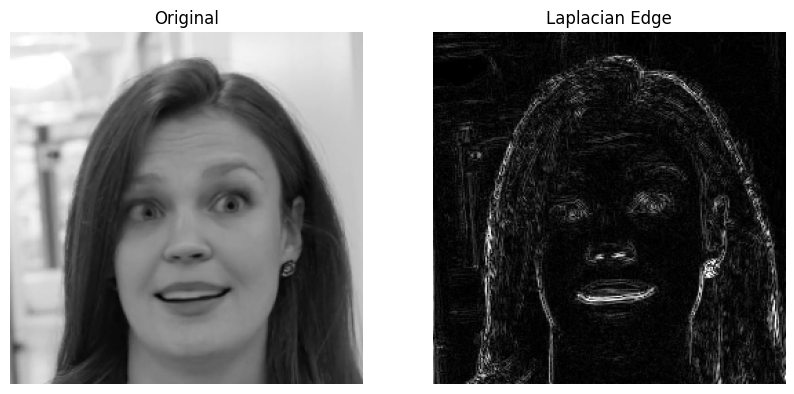

In [9]:
import cv2
import os
import random
import matplotlib.pyplot as plt

def apply_laplacian(input_dir, output_dir, preview_count=2):
    preview_images = []
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for img_file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
            lap = cv2.convertScaleAbs(lap)
            output_path = os.path.join(output_dir, img_file)
            cv2.imwrite(output_path, lap)
            if len(preview_images) < preview_count:
                preview_images.append((img_path, output_path))
    return preview_images

folders = {
    r"C:\Users\ASUS\Downloads\Test\train Real": "./edges/train/real",
    r"C:\Users\ASUS\Downloads\Test\train fake": "./edges/train/fake",
    r"C:\Users\ASUS\Downloads\Test\valid real": "./edges/valid/real",
    r"C:\Users\ASUS\Downloads\Test\valid fake": "./edges/valid/fake"
}

preview_samples = []
for input_dir, output_dir in folders.items():
    preview_samples.extend(apply_laplacian(input_dir, output_dir))

# Step 2: Display the preview samples
def display_images(samples):
    for original_path, edge_path in samples:
        original_img = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
        edge_img = cv2.imread(edge_path, cv2.IMREAD_GRAYSCALE)
        
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(original_img, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.title("Laplacian Edge")
        plt.imshow(edge_img, cmap='gray')
        plt.axis('off')
        
        plt.show()

display_images(random.sample(preview_samples, min(4, len(preview_samples))))


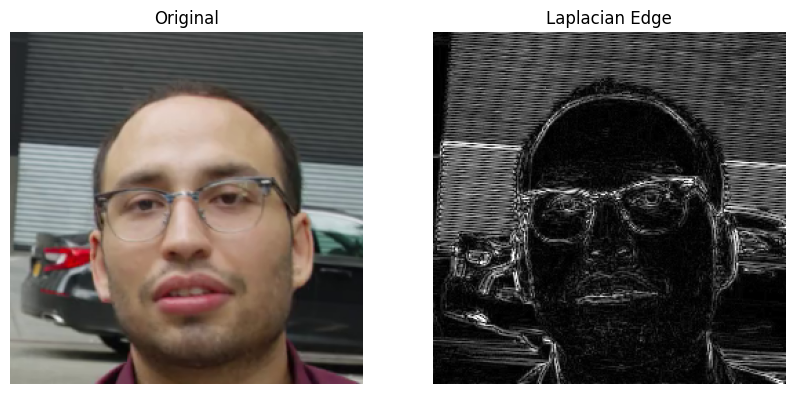

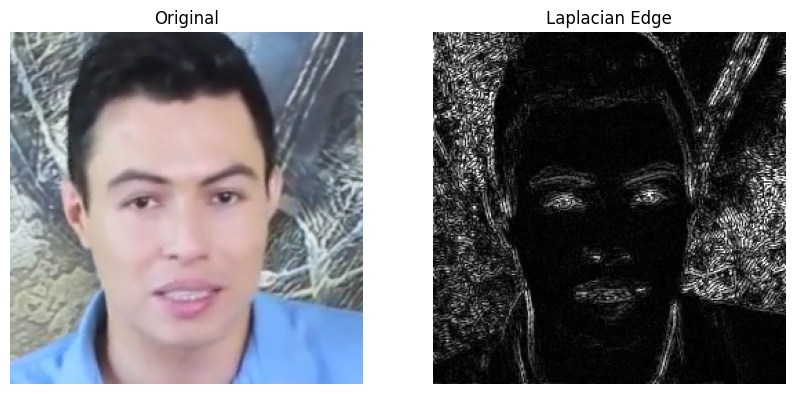

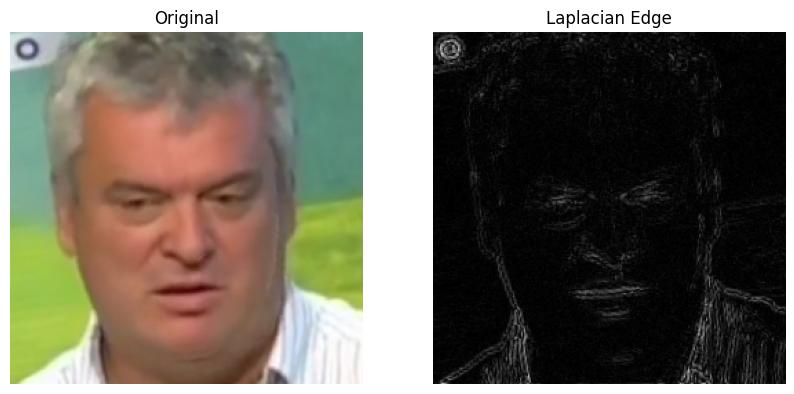

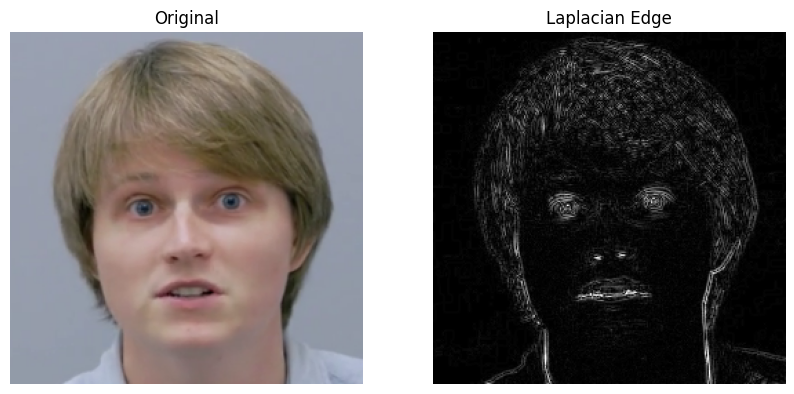

In [11]:
import cv2
import os
import random
import matplotlib.pyplot as plt

def apply_laplacian(input_dir, output_dir, preview_count=2):
    preview_images = []
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for img_file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_file)
        img = cv2.imread(img_path)  # Keep original color format
        if img is not None:
            # Convert to grayscale only for edge detection, but process the edges back in color
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            lap = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)
            lap = cv2.convertScaleAbs(lap)
            # Create a color representation of the edges
            color_edge = cv2.cvtColor(lap, cv2.COLOR_GRAY2BGR)
            output_path = os.path.join(output_dir, img_file)
            cv2.imwrite(output_path, color_edge)  # Save edge-detected image
            if len(preview_images) < preview_count:
                preview_images.append((img_path, output_path))
    return preview_images

# Specify dataset folders
folders = {
    r"C:\Users\ASUS\Downloads\Test\train Real": "./edges/train/real",
    r"C:\Users\ASUS\Downloads\Test\train fake": "./edges/train/fake",
    r"C:\Users\ASUS\Downloads\Test\valid real": "./edges/valid/real",
    r"C:\Users\ASUS\Downloads\Test\valid fake": "./edges/valid/fake"
}

preview_samples = []
for input_dir, output_dir in folders.items():
    preview_samples.extend(apply_laplacian(input_dir, output_dir))

# Display previews of original and processed images
def display_images(samples):
    for original_path, edge_path in samples:
        original_img = cv2.imread(original_path)  # Read in color
        edge_img = cv2.imread(edge_path)  # Read in color
        
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.title("Laplacian Edge")
        plt.imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
        plt.axis('off')
        
        plt.show()

# Display 4 random samples
display_images(random.sample(preview_samples, min(4, len(preview_samples))))


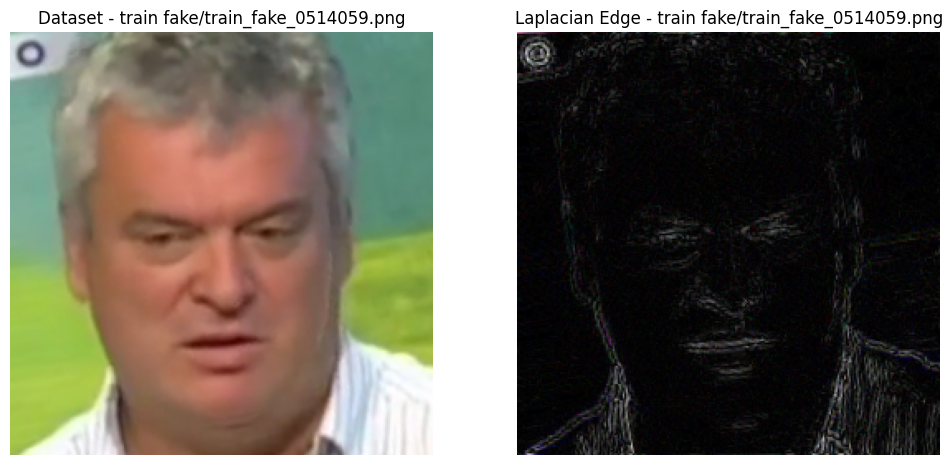

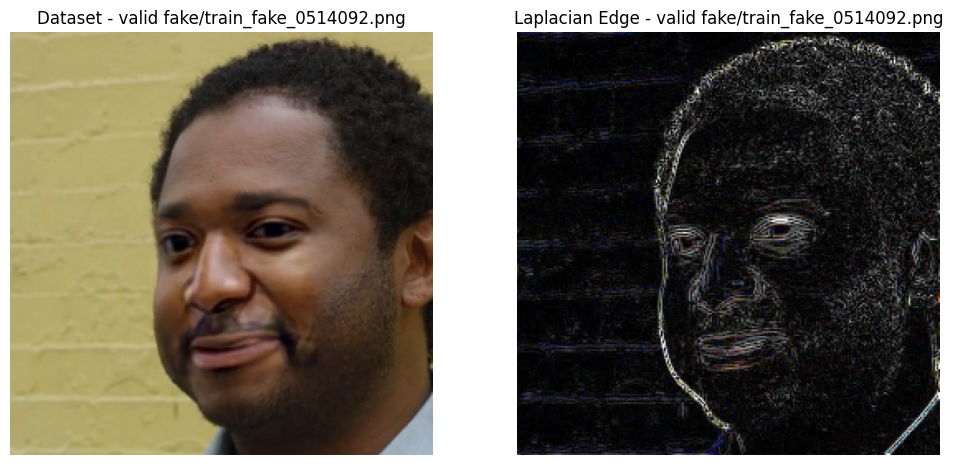

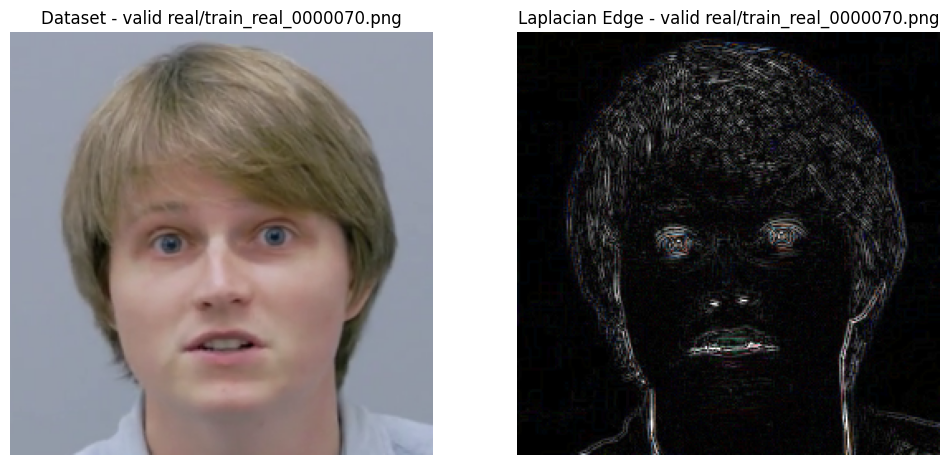

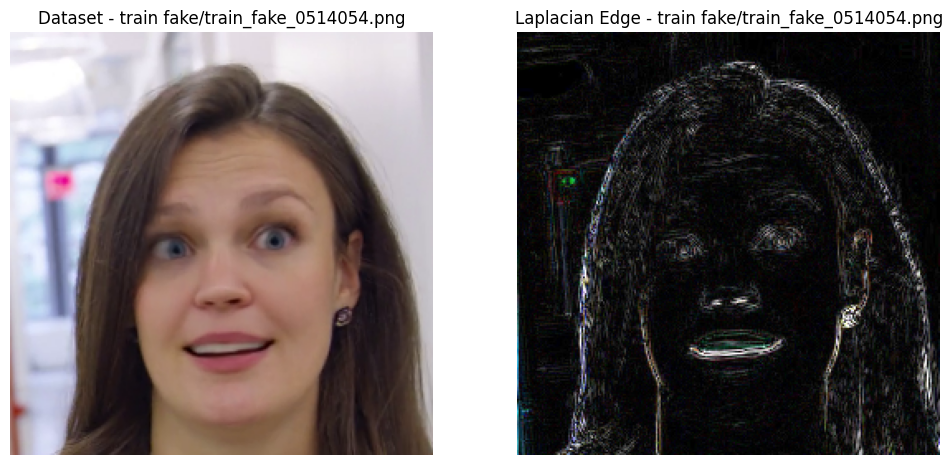

In [2]:
import cv2
import os
import random
import matplotlib.pyplot as plt

def apply_laplacian(input_dir, output_dir, preview_count=2):
    preview_images = []
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for img_file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_file)
        img = cv2.imread(img_path)  # Load in original format (color)
        if img is not None:
            lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
            lap = cv2.convertScaleAbs(lap)
            output_path = os.path.join(output_dir, img_file)
            cv2.imwrite(output_path, lap)
            if len(preview_images) < preview_count:
                preview_images.append((img_path, output_path, os.path.basename(input_dir)))
    return preview_images

# Folder structure
folders = {
    r"C:\Users\ASUS\Downloads\Test\train Real": "./edges/train/real",
    r"C:\Users\ASUS\Downloads\Test\train fake": "./edges/train/fake",
    r"C:\Users\ASUS\Downloads\Test\valid real": "./edges/valid/real",
    r"C:\Users\ASUS\Downloads\Test\valid fake": "./edges/valid/fake"
}

preview_samples = []
for input_dir, output_dir in folders.items():
    preview_samples.extend(apply_laplacian(input_dir, output_dir))

# Display the preview samples
def display_images(samples):
    for original_path, edge_path, folder_name in samples:
        original_img = cv2.imread(original_path)
        edge_img = cv2.imread(edge_path)
        
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.title(f"Dataset - {folder_name}/{os.path.basename(original_path)}")
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.title(f"Laplacian Edge - {folder_name}/{os.path.basename(edge_path)}")
        plt.imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        plt.show()

# Randomly show 4 images
display_images(random.sample(preview_samples, min(4, len(preview_samples))))


#Preprocess Dataset for Edge Detection

Use the Laplacian edge detection method to preprocess all images in the dataset (train and validation, real and fake).

#Dataset Class

Create a PyTorch dataset class that combines original images and their edge-detected versions.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class DeepfakeDataset(Dataset):
    def __init__(self, orig_dir, edge_dir, label, transform=None):
        self.orig_dir = orig_dir
        self.edge_dir = edge_dir
        self.label = label  # 0 for real, 1 for fake
        self.file_list = os.listdir(orig_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.orig_dir, self.file_list[idx])
        edge_path = os.path.join(self.edge_dir, self.file_list[idx])
        
        # Load images
        orig_img = cv2.imread(img_path)
        orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
        edge_img = cv2.imread(edge_path, cv2.IMREAD_GRAYSCALE)
        
        if self.transform:
            orig_img = self.transform(orig_img)
            edge_img = self.transform(edge_img).unsqueeze(0)  # Add channel dimension for grayscale
        
        return orig_img, edge_img, self.label


# 3. Load Data

Combine real and fake datasets into PyTorch DataLoaders.

In [ ]:
from torch.utils.data import DataLoader, ConcatDataset

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create datasets
train_real_dataset = DeepfakeDataset(r"C:\Users\ASUS\Downloads\Test\train Real", "./edges/train_real", label=0, transform=transform)
train_fake_dataset = DeepfakeDataset( r"C:\Users\ASUS\Downloads\Test\train fake", "./edges/train_fake", label=1, transform=transform)
valid_real_dataset = DeepfakeDataset(r"C:\Users\ASUS\Downloads\Test\valid real", "./edges/valid_real", label=0, transform=transform)
valid_fake_dataset = DeepfakeDataset(r"C:\Users\ASUS\Downloads\Test\valid fake", "./edges/valid_fake", label=1, transform=transform)

# Combine real and fake datasets
train_dataset = ConcatDataset([train_real_dataset, train_fake_dataset])
valid_dataset = ConcatDataset([valid_real_dataset, valid_fake_dataset])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


# Update CNN Model

Define the CNN to handle both original and edge-detected images.



In [ ]:
import torch.nn as nn

class EdgeEnhancedCNN(nn.Module):
    def __init__(self):
        super(EdgeEnhancedCNN, self).__init__()
        # Original image path
        self.orig_conv = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # Edge-detected image path
        self.edge_conv = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(128 * 2 * 64 * 64, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 2)
        )

    def forward(self, x_orig, x_edge):
        orig_features = self.orig_conv(x_orig)
        edge_features = self.edge_conv(x_edge)
        combined = torch.cat((orig_features, edge_features), dim=1)
        combined = combined.view(combined.size(0), -1)
        return self.fc(combined)


# Train the Model

Train the model using the combined data.

In [ ]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EdgeEnhancedCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for orig_imgs, edge_imgs, labels in train_loader:
        orig_imgs, edge_imgs, labels = orig_imgs.to(device), edge_imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(orig_imgs, edge_imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")


# 6. Validate the Model

Validate the model and compute F1-score and AUC.

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for orig_imgs, edge_imgs, labels in valid_loader:
        orig_imgs, edge_imgs = orig_imgs.to(device), edge_imgs.to(device)
        labels = labels.to(device)
        
        outputs = model(orig_imgs, edge_imgs)
        preds = torch.argmax(outputs, dim=1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Metrics
f1 = f1_score(all_labels, all_preds, average='binary')
auc = roc_auc_score(all_labels, all_preds)
print(f"Validation F1 Score: {f1}, AUC: {auc}")


# 7. Grad-CAM Visualization
Generate Grad-CAM visualizations to highlight regions contributing to the model's decisions.

In [ ]:
import numpy as np
import cv2

def grad_cam(model, img_tensor, edge_tensor, target_layer):
    model.eval()
    grad_val = []

    def backward_hook(module, grad_in, grad_out):
        grad_val.append(grad_out[0])

    handle = target_layer.register_backward_hook(backward_hook)
    output = model(img_tensor, edge_tensor)
    pred_class = output.argmax(dim=1).item()
    model.zero_grad()
    output[0, pred_class].backward()

    grads = grad_val[0].squeeze().cpu().numpy()
    heatmap = np.mean(grads, axis=0)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (img_tensor.size(2), img_tensor.size(3)))
    return heatmap

# Apply Grad-CAM
img_tensor, edge_tensor = ...  # Load a sample
target_layer = model.orig_conv[-1]  # Example target layer
heatmap = grad_cam(model, img_tensor, edge_tensor, target_layer)
plt.imshow(heatmap, cmap='jet')
plt.show()
